In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
twowheeler = pd.read_csv(r"E:\internship\Dataset\archive\2-wheeler-EV-bikewale.csv")

In [3]:
twowheeler.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name'],
      dtype='object')

In [4]:
twowheeler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   Used it for         844 non-null    object 
 2   Owned for           844 non-null    object 
 3   Ridden for          668 non-null    object 
 4   rating              844 non-null    int64  
 5   Visual Appeal       739 non-null    float64
 6   Reliability         716 non-null    float64
 7   Performance         345 non-null    float64
 8   Service Experience  703 non-null    float64
 9   Extra Features      185 non-null    float64
 10  Comfort             530 non-null    float64
 11  Maintenance cost    180 non-null    float64
 12  Value for Money     390 non-null    float64
 13  Model Name          844 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 92.4+ KB


In [5]:
# list of models in two wheeler electric vehicle
model2wheeler= twowheeler.value_counts(['Model Name'])
model2wheeler

Model Name             
Hero Electric Flash        102
Okinawa Praise              95
Hero Electric Optima        82
Revolt RV 400               52
PURE EV EPluto 7G           50
Hero Electric Photon        38
Tork Kratos                 38
Ather 450X                  30
OLA S1                      29
OLA S1 Pro                  28
Ampere Magnus EX            28
Ampere REO                  24
Benling Aura                22
Ampere Magnus Pro           22
PURE EV ETrance Neo         19
TVS iQube                   17
Bajaj Chetak                15
Okinawa Ridge Plus          15
Ampere Zeal                 13
Bounce Infinity E1          12
Okinawa i-Praise            11
Revolt RV 300               10
Techo Electra Emerge        10
Hero Electric Optima CX      9
Techo Electra Raptor         9
Hero Electric NYX            9
Okinawa Lite                 8
Okinawa R30                  8
Yo Drift                     5
e-bike Gen Nxt               5
Joy e-bike Wolf              5
Gemopai Ryder  

In [6]:
twowheeler.value_counts(['Used it for'])

Used it for       
Daily Commute         600
Everything            160
Occasional Commute     56
Leisure Rides          20
Tours                   8
dtype: int64

In [7]:
# Renaming "Tours" with 1, 'Leisure Rides' with 2, 'Occasional Commute' with 3, 'Daily Commute' with 4 and 
# 'Everything' with 5
twowheeler['Used it for'].replace({'Tours': '1', 'Leisure Rides': '2', 'Occasional Commute': '3', 
                                   'Daily Commute': '4', 'Everything': '5'})

0      4
1      5
2      4
3      4
4      4
      ..
839    4
840    5
841    4
842    4
843    4
Name: Used it for, Length: 844, dtype: object

In [8]:
twowheeler['Used it for'] = twowheeler['Used it for'].replace({'Tours': 1, 'Leisure Rides': 2, 'Occasional Commute': 3, 
                                   'Daily Commute': 4, 'Everything': 5})
twowheeler['Used it for'].value_counts()

4    600
5    160
3     56
2     20
1      8
Name: Used it for, dtype: int64

In [9]:
# Owned for
twowheeler.value_counts(['Owned for'])

Owned for         
< 3 months            220
> 1 yr                203
Never owned           175
6 months-1 yr         134
3-6 months            111
Occasional Commute      1
dtype: int64

In [10]:
# Here in 'Owned for' column the occusional commute is 1 which doesnot match in the column; it should be the duration.
# Occasional commute means the rider is using very less this ev therfore there is higher probability that he has
# Never owned so replacing Occasional Commute to never owned as it has only 1 values.
twowheeler['Owned for'] = twowheeler['Owned for'].replace({'Occasional Commute': 'Never owned'})
twowheeler.value_counts(['Owned for'])

Owned for    
< 3 months       220
> 1 yr           203
Never owned      176
6 months-1 yr    134
3-6 months       111
dtype: int64

In [11]:
# Now the 'Owned for' has 5 groups replacing it with 1 to 5 
# Renaming 'Never owned' with 1, '< 3 months' with 2, '3-6 months' with 3, '6 months-1 yr' with 4, and '> 1 yr' with 5

twowheeler['Owned for'] = twowheeler['Owned for'].replace({'Never owned': 1, '< 3 months': 2, '3-6 months': 3, 
                                   '6 months-1 yr': 4, '> 1 yr': 5})
twowheeler.value_counts(['Owned for'])

Owned for
2            220
5            203
1            176
4            134
3            111
dtype: int64

In [12]:
# Ridden for
twowheeler.value_counts(['Ridden for'])

Ridden for     
< 5000 kms         459
5000-10000 kms     138
> 15000 kms         38
10000-15000 kms     32
Never owned          1
dtype: int64

In [13]:
# Here in 'Ridden for' column it says how much kilometers the ev has run.
# Here in this column there is one value Never owned which is mistake/ wrong entry it should be in kms 
# However as it has never owned but the rider has rode the bike so assuming it to less than 5000 kms and renaming it to
# < 5000 kms

twowheeler['Ridden for'] = twowheeler['Ridden for'].replace({'Never owned': '< 5000 kms'})
twowheeler.value_counts(['Ridden for'])

Ridden for     
< 5000 kms         460
5000-10000 kms     138
> 15000 kms         38
10000-15000 kms     32
dtype: int64

In [14]:
# Now renaming the Ridden for elements with numbers 
# < 5000 kms         1
# 5000-10000 kms     2
# > 15000 kms        4
# 10000-15000 kms    3

twowheeler['Ridden for'] = twowheeler['Ridden for'].replace({'< 5000 kms': 1, '5000-10000 kms': 2, '10000-15000 kms': 3, 
                                   '> 15000 kms': 4})
twowheeler.value_counts(['Ridden for'])

Ridden for
1.0           460
2.0           138
4.0            38
3.0            32
dtype: int64

In [15]:
twowheeler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   Used it for         844 non-null    int64  
 2   Owned for           844 non-null    int64  
 3   Ridden for          668 non-null    float64
 4   rating              844 non-null    int64  
 5   Visual Appeal       739 non-null    float64
 6   Reliability         716 non-null    float64
 7   Performance         345 non-null    float64
 8   Service Experience  703 non-null    float64
 9   Extra Features      185 non-null    float64
 10  Comfort             530 non-null    float64
 11  Maintenance cost    180 non-null    float64
 12  Value for Money     390 non-null    float64
 13  Model Name          844 non-null    object 
dtypes: float64(9), int64(3), object(2)
memory usage: 92.4+ KB


In [16]:
# rating
twowheeler.value_counts('rating')

rating
5    341
1    239
4    151
3     65
2     48
dtype: int64

In [17]:
# Visual Appeal
twowheeler.value_counts('Visual Appeal')

Visual Appeal
5.0    297
4.0    203
3.0    109
1.0     91
2.0     39
dtype: int64

In [18]:
# Reliability
twowheeler.value_counts('Reliability')

Reliability
5.0    237
1.0    177
4.0    158
3.0     91
2.0     53
dtype: int64

In [19]:
twowheeler.describe()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
count,844.000000,844.000000,668.000000,844.000000,739.000000,716.000000,345.000000,703.000000,185.000000,530.000000,180.000000,390.000000
mean,4.047393,2.962085,1.473054,3.363744,3.779432,3.314246,3.527536,3.145092,2.935135,3.664151,3.394444,3.382051
std,0.659005,1.488902,0.829113,1.689873,1.350021,1.585024,1.507721,1.637871,1.630587,1.387371,1.392306,1.510949
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000
50%,4.000000,3.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [20]:
# Calculate the value counts of the MODEL
model_counts = twowheeler['Model Name'].value_counts()

In [21]:
# Sort the counts in descending order
model_counts = model_counts.sort_values(ascending=False)

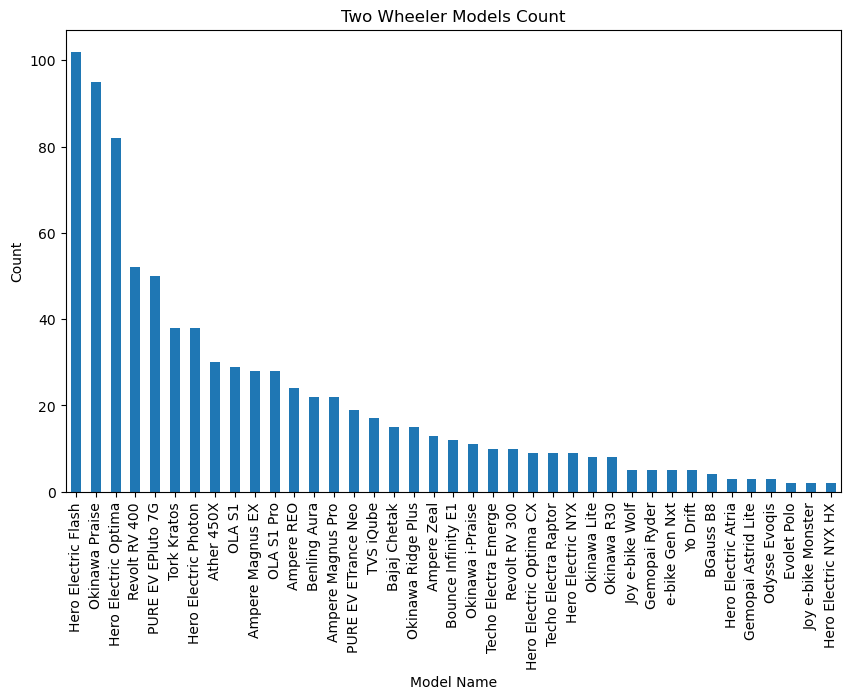

In [23]:
# Plot the bar graph
plt.figure(figsize=(10, 6))  # Set the size of the figure
model_counts.plot(kind='bar')
plt.xlabel('Model Name')
plt.ylabel('Count')
plt.title('Two Wheeler Models Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

In [41]:
#  Droping the columns review and Model name
new_df = twowheeler.drop(["review","Model Name"], axis=1)

new_df

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,4,1,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0
1,5,5,1.0,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0
2,4,2,1.0,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0
3,4,4,2.0,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0
4,4,4,1.0,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
839,4,5,1.0,2,2.0,2.0,NaN,2.0,NaN,2.0,NaN,3.0
840,5,2,1.0,5,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN
841,4,5,2.0,2,2.0,2.0,4.0,2.0,3.0,NaN,1.0,NaN
842,4,3,1.0,5,4.0,4.0,NaN,NaN,NaN,4.0,NaN,5.0


In [26]:
!pip install ydata-profiling

In [28]:
import ydata_profiling as pp


In [42]:
pp.ProfileReport(new_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
list3= twowheeler["Model Name"].value_counts()
list4= list3[list3>20]
list4

Hero Electric Flash     102
Okinawa Praise           95
Hero Electric Optima     82
Revolt RV 400            52
PURE EV EPluto 7G        50
Tork Kratos              38
Hero Electric Photon     38
Ather 450X               30
OLA S1                   29
OLA S1 Pro               28
Ampere Magnus EX         28
Ampere REO               24
Benling Aura             22
Ampere Magnus Pro        22
Name: Model Name, dtype: int64

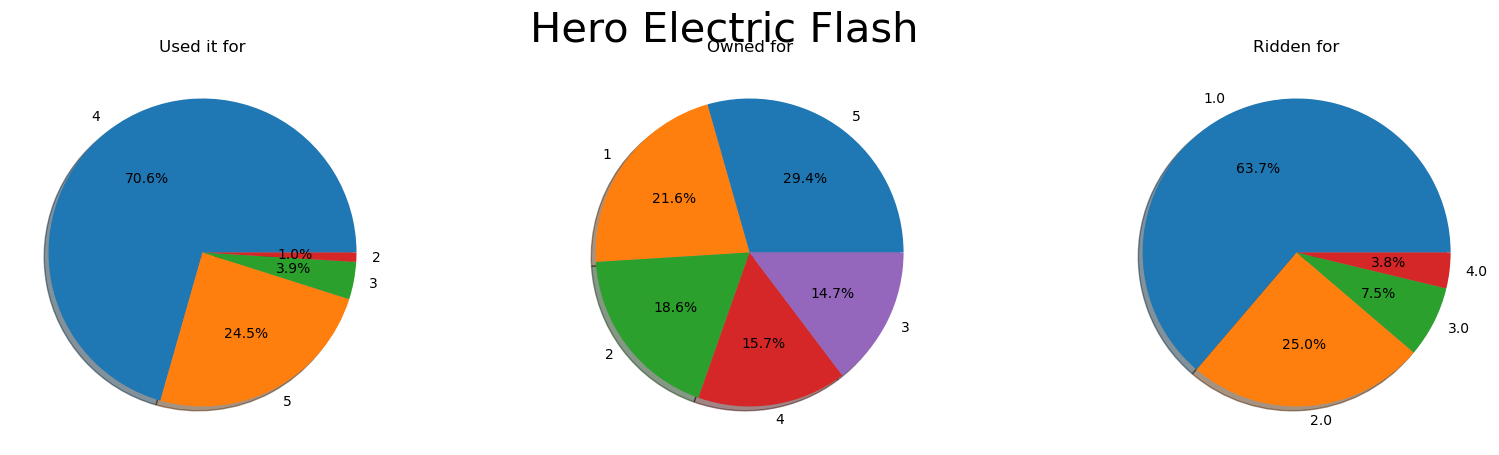

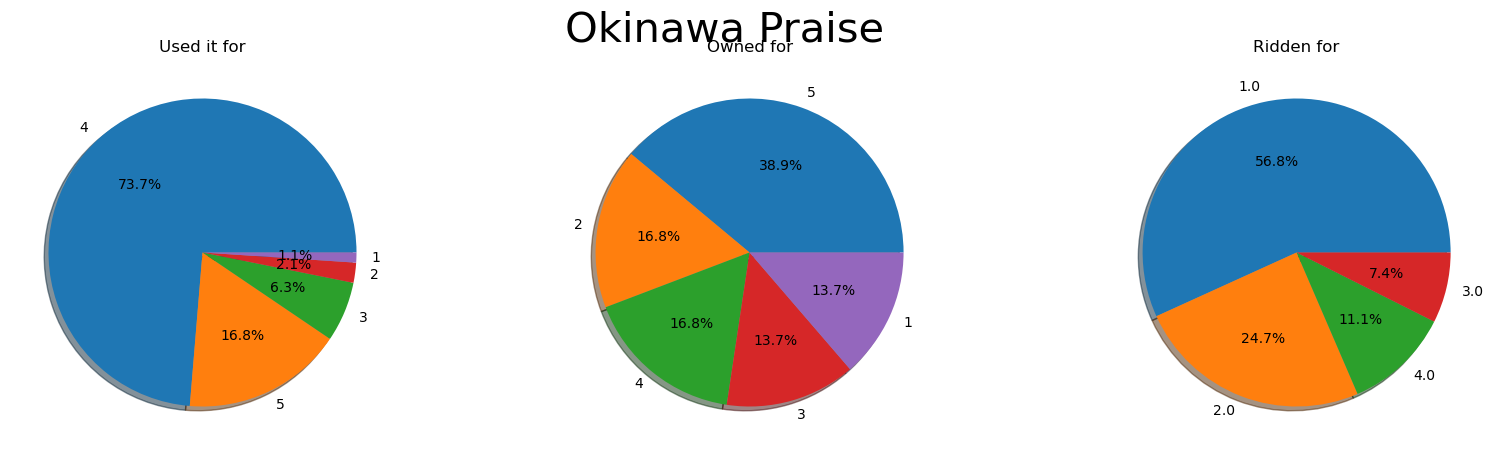

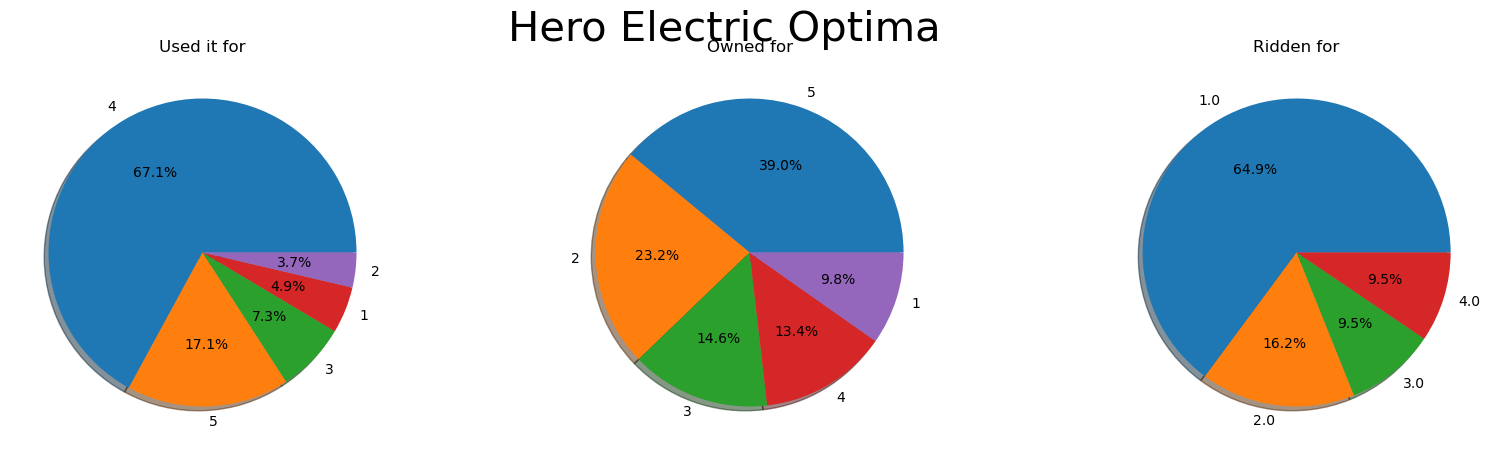

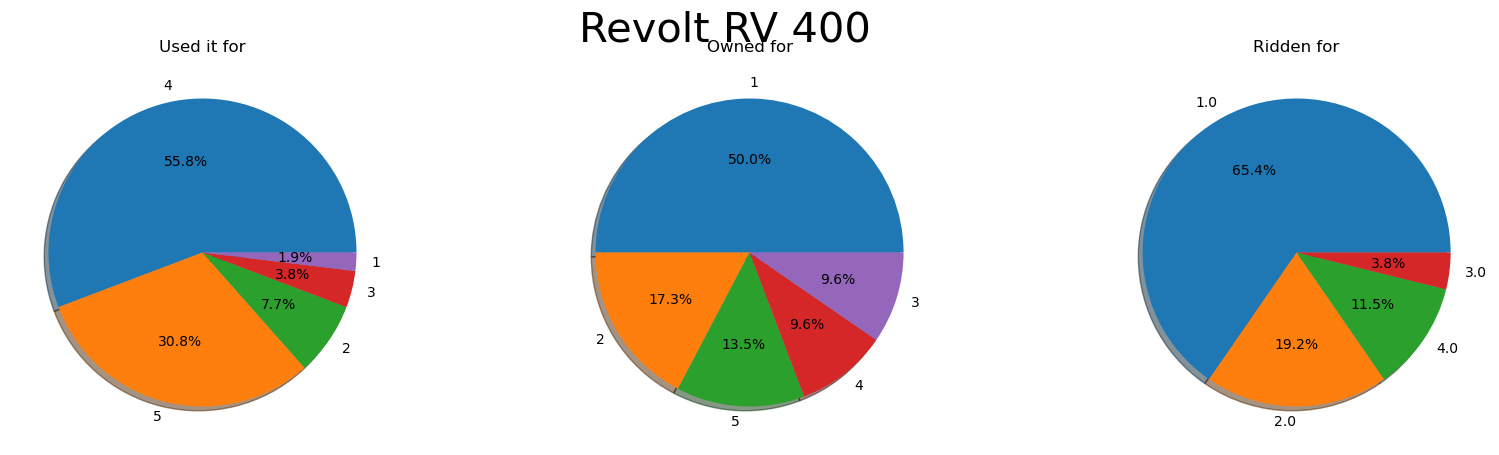

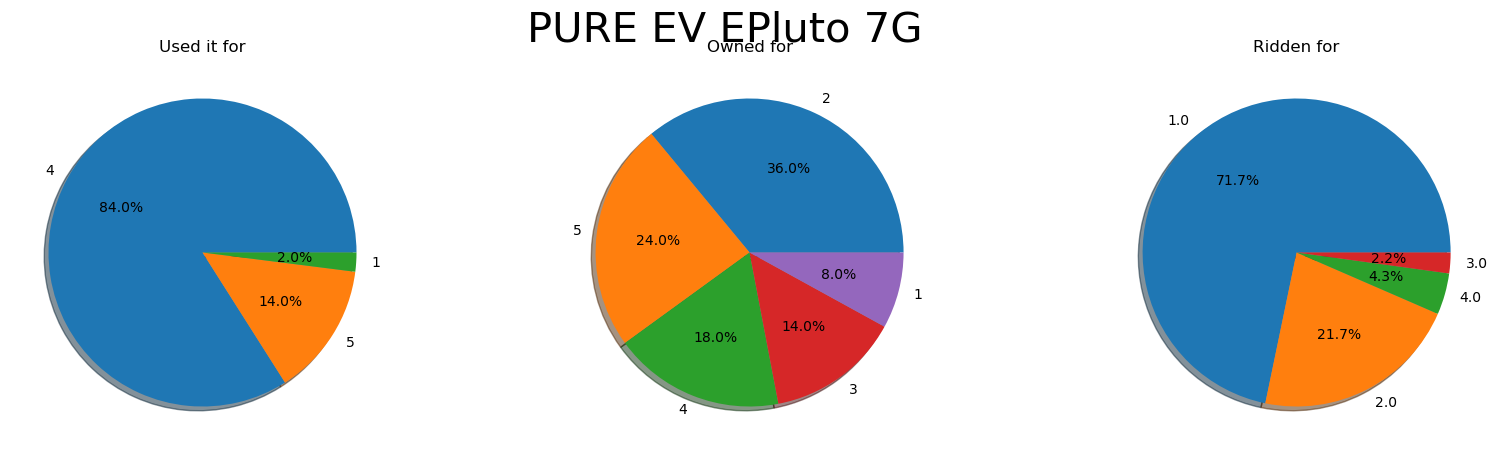

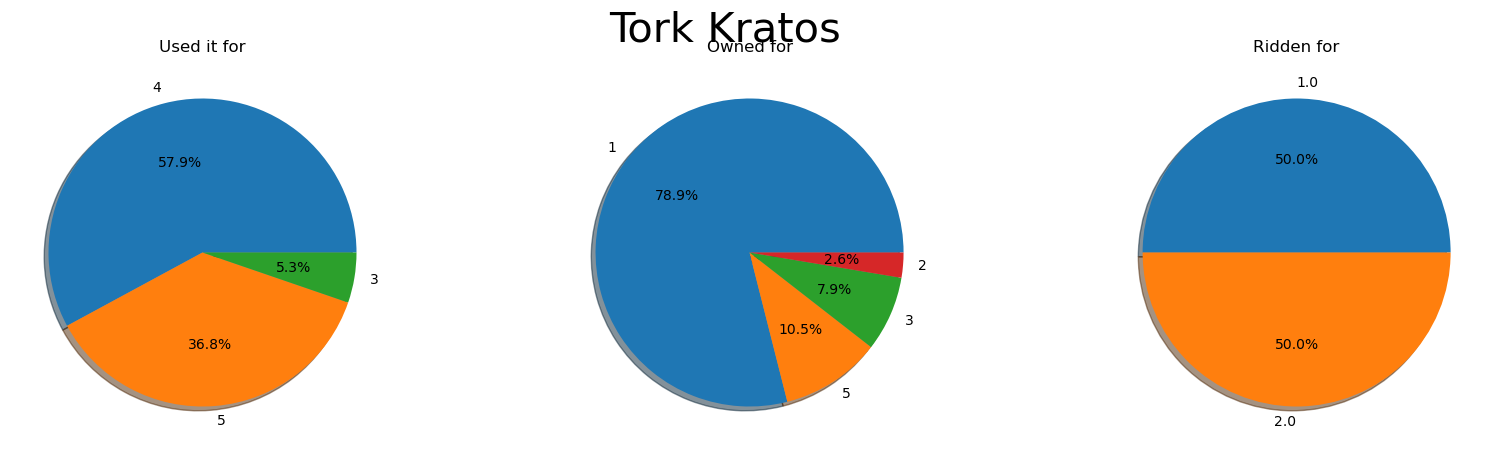

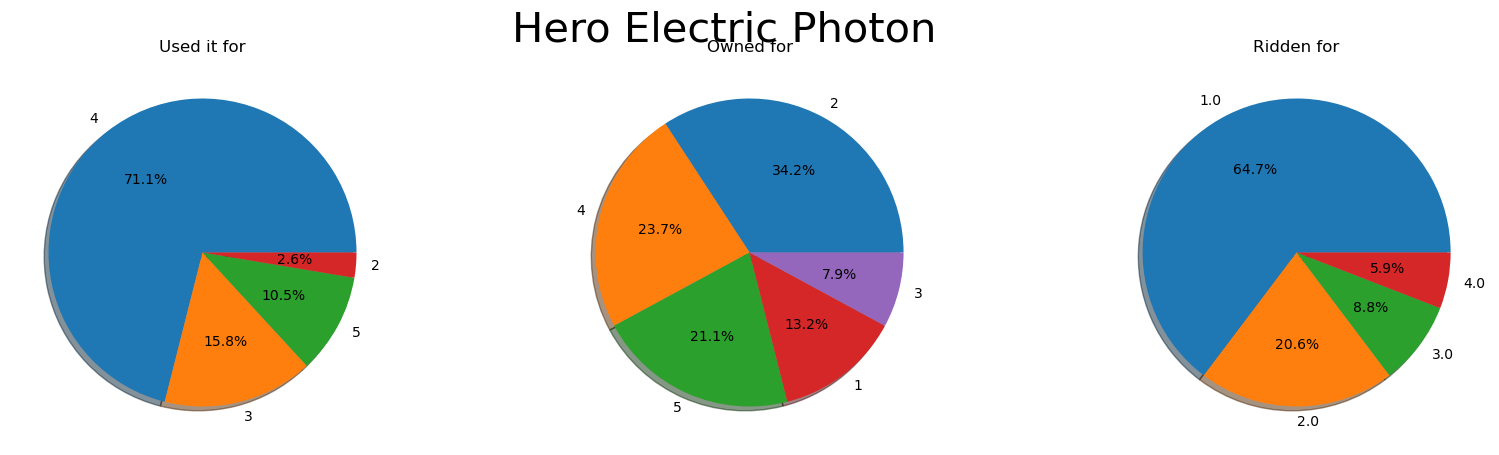

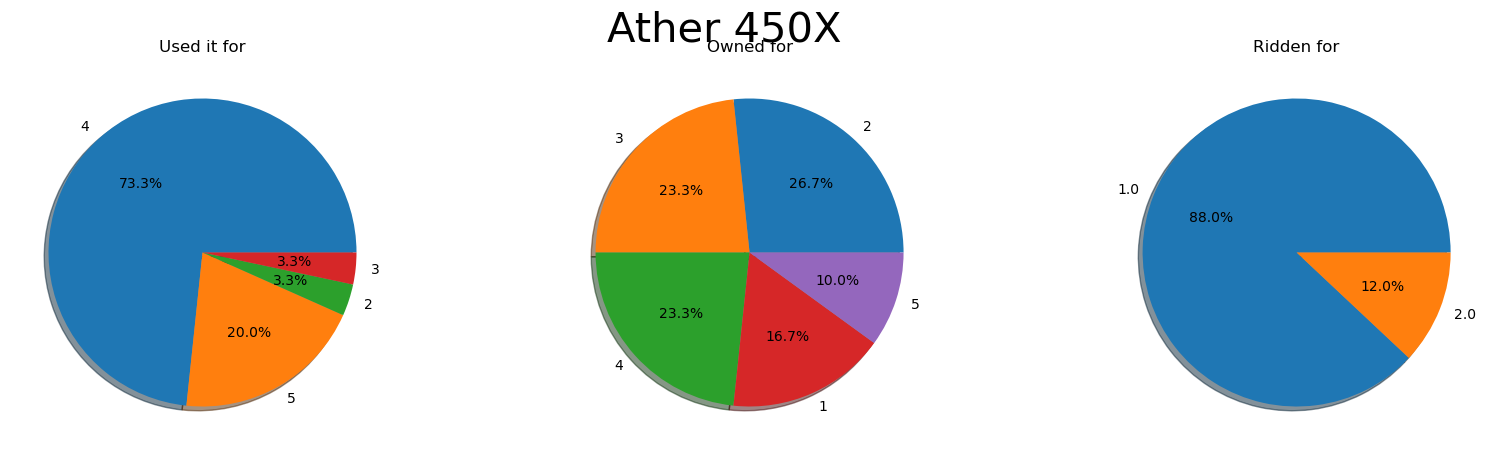

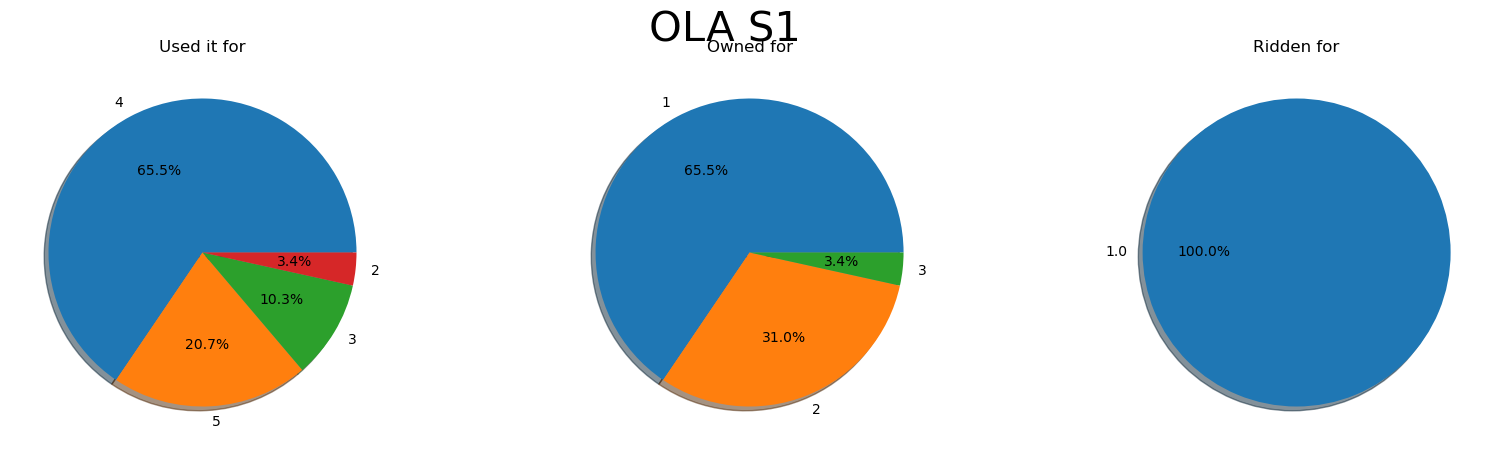

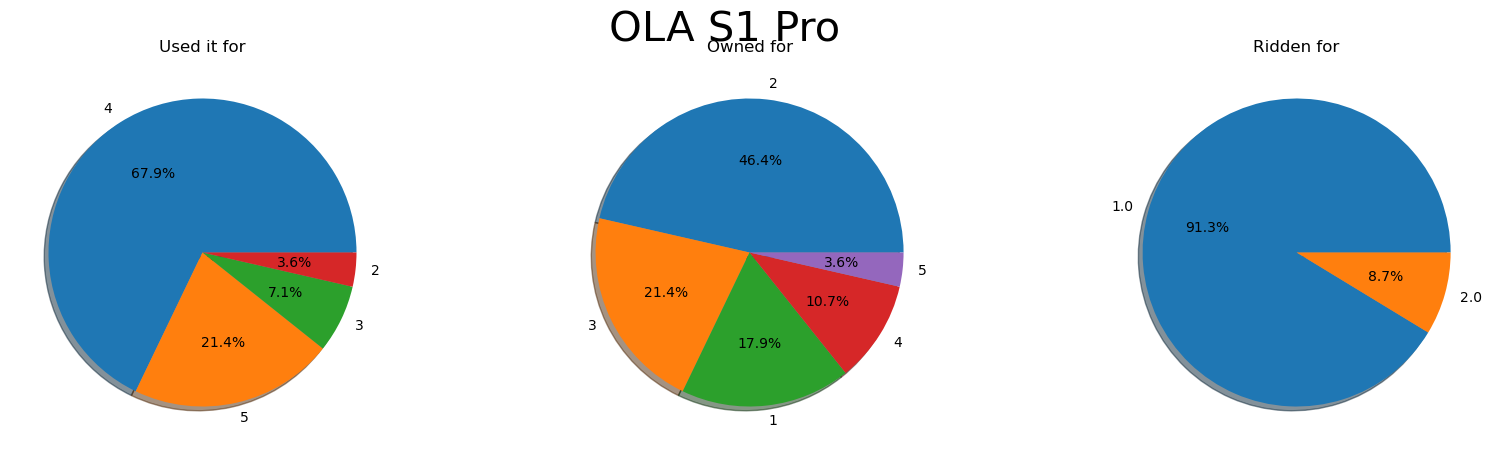

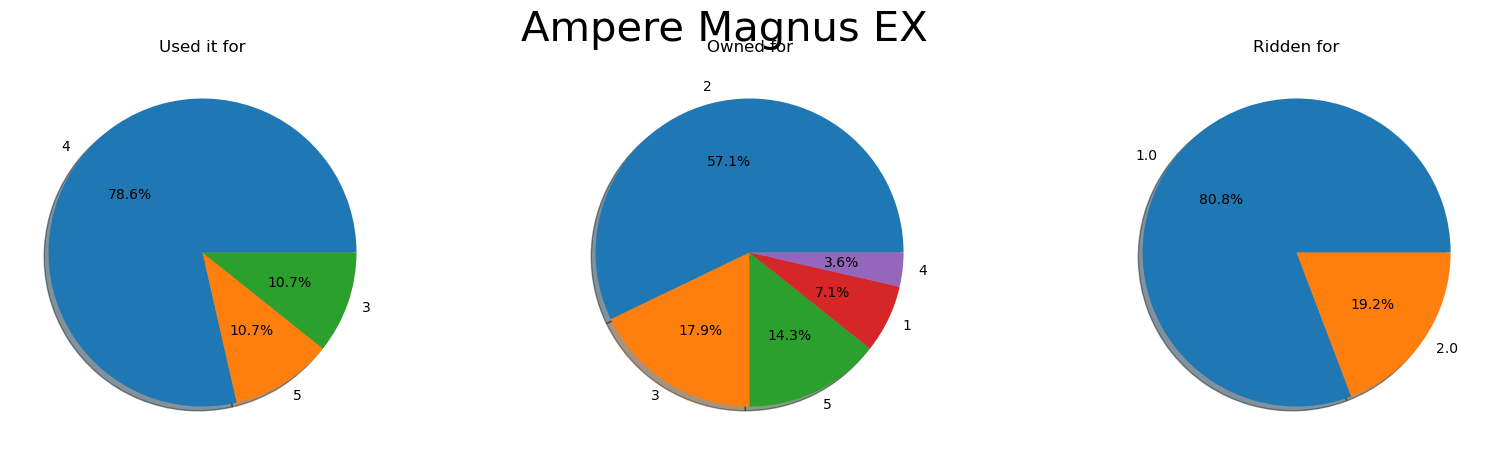

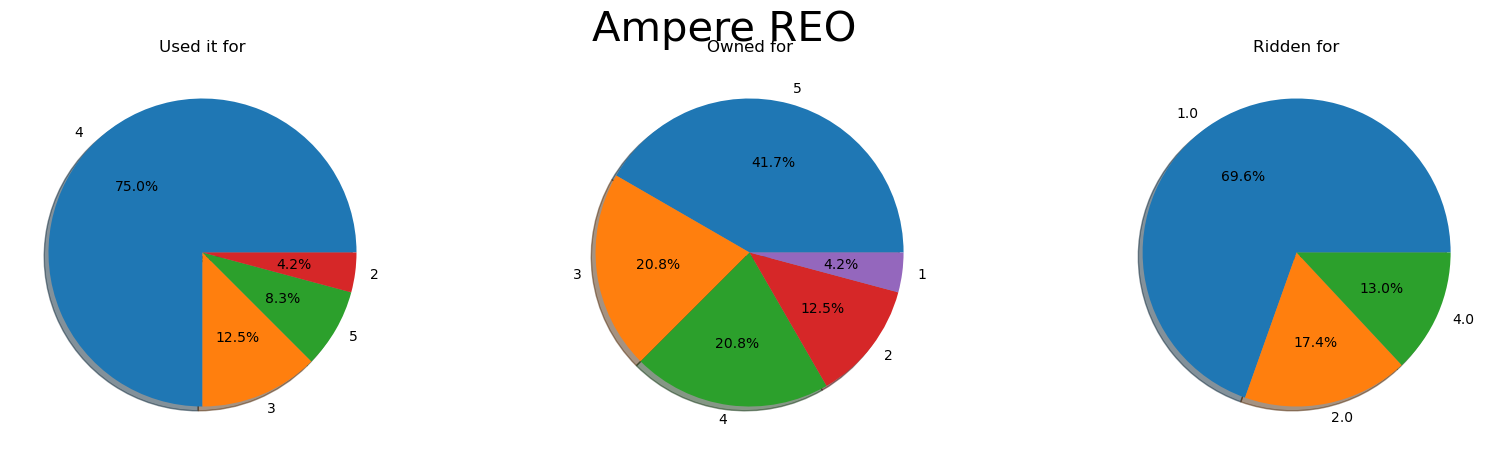

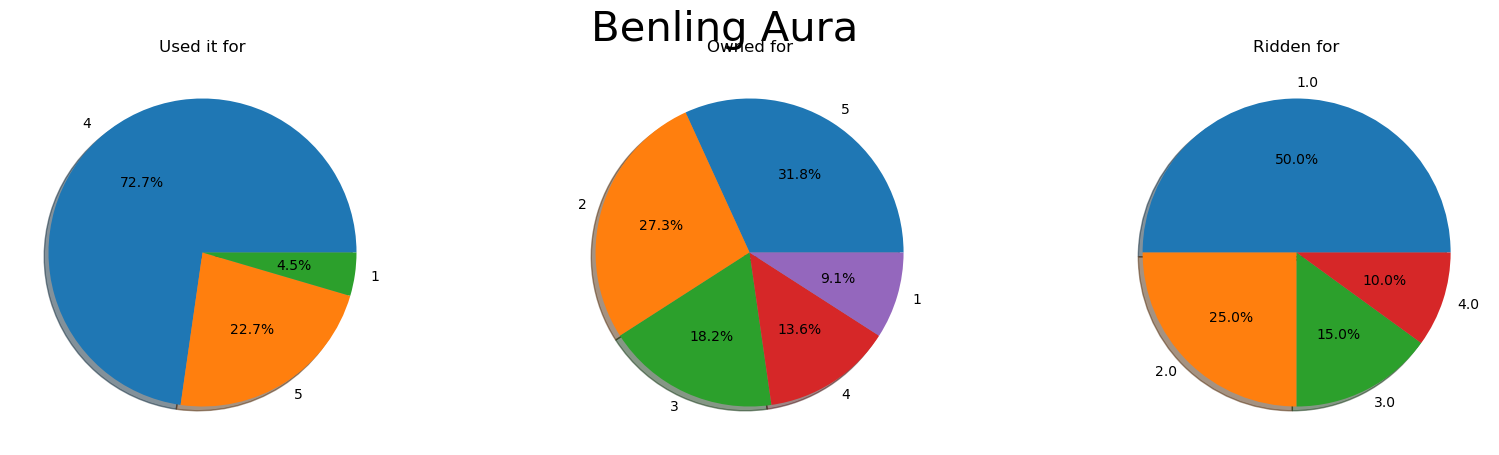

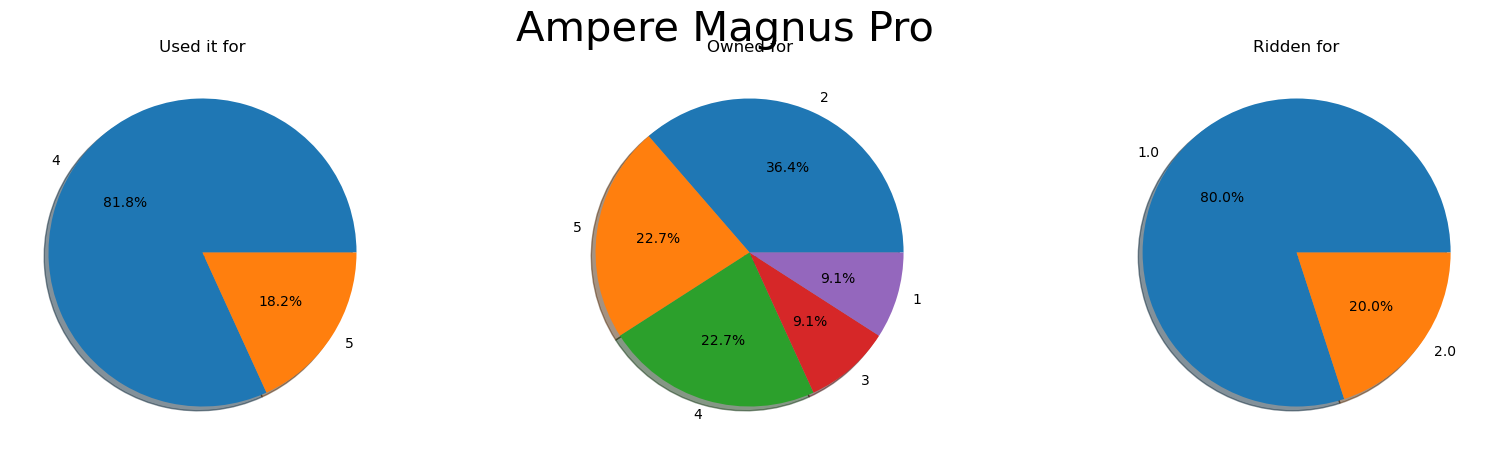

In [46]:
# The customers, how they used vehicles, how long owned and how long ridden for each vechicle company

list5= list4.index
grp = twowheeler.groupby("Model Name")

for i in range(len(list5)):

    a=grp.get_group(list5[i])

    plt.figure(figsize=(20,5))

    plt.subplot(131)
    plt.pie(a["Used it for"].value_counts(),labels=a["Used it for"].value_counts().index, autopct='%1.1f%%', shadow = True)
    plt.title("Used it for")

    plt.subplot(132)
    plt.pie(a["Owned for"].value_counts(),labels=a["Owned for"].value_counts().index, autopct='%1.1f%%', shadow = True)
    plt.title("Owned for")

    plt.subplot(133)
    plt.pie(a["Ridden for"].value_counts(),labels=a["Ridden for"].value_counts().index, autopct='%1.1f%%', shadow = True)
    plt.title("Ridden for")


    plt.suptitle(list5[i], fontsize=30);

In [47]:
list6= list3[list3<20].index
gk= grp.mean()
gk.drop(list6,axis=0,inplace=True)
gk.shape

(14, 12)

In [48]:
gk.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
Model Name,,,,,,,,,,,,
Ampere Magnus EX,4.000000,2.607143,1.192308,3.964286,4.153846,3.760000,3.720000,3.619048,3.619048,5.000000,4.052632,5.000000
Ampere Magnus Pro,4.181818,3.136364,1.200000,3.090909,3.312500,3.437500,3.000000,2.812500,2.933333,4.000000,3.571429,4.000000
Ampere REO,3.875000,3.833333,1.565217,2.583333,3.181818,2.761905,1.000000,2.142857,1.000000,3.047619,1.000000,2.952381
Ather 450X,4.100000,2.833333,1.120000,3.666667,4.034483,3.923077,4.111111,3.576923,3.000000,3.851852,3.500000,4.000000
Benling Aura,4.090909,3.318182,1.850000,2.863636,3.631579,2.947368,3.529412,2.444444,2.687500,2.000000,3.125000,1.500000


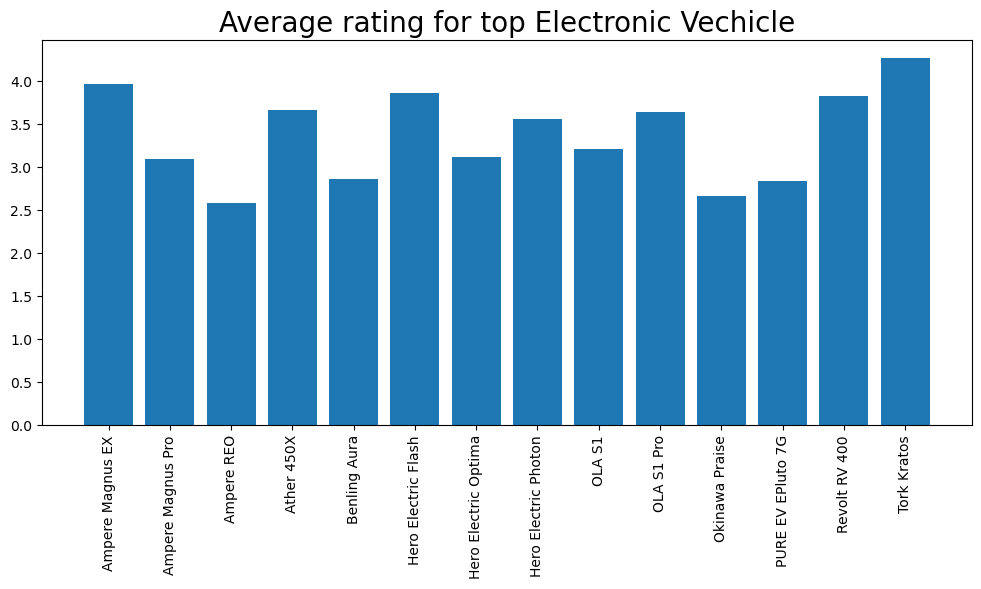

In [60]:
# Average rating for all electronic vechicle

plt.figure(figsize=(12,5))
plt.bar(gk.index, gk.rating)
plt.title("Average rating for top Electronic Vechicle", fontsize = 20)
plt.xticks(rotation=90);

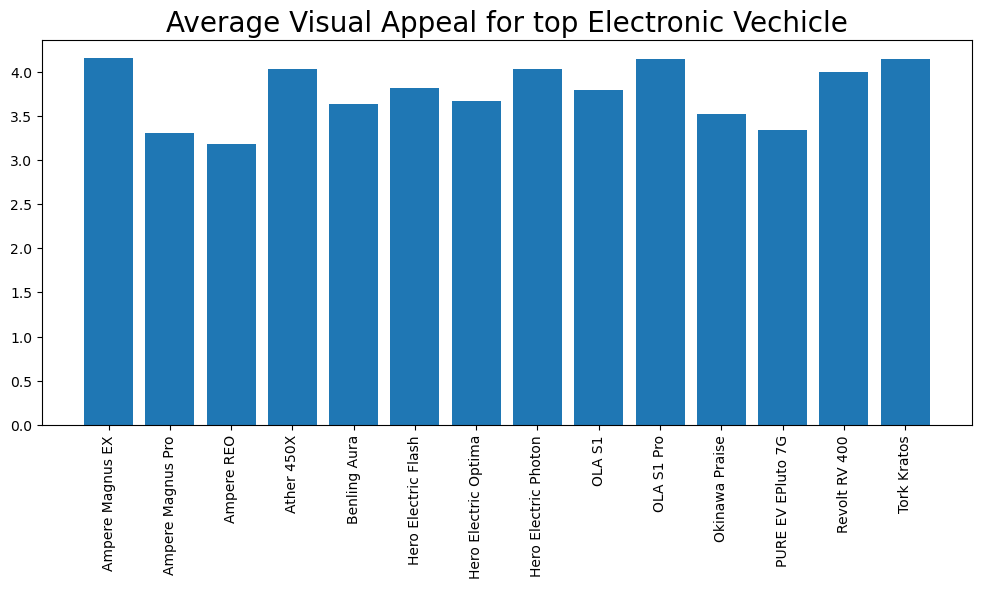

In [59]:
# Average Visual Appeal for all electronic vechicle

plt.figure(figsize=(12,5))
plt.bar(gk.index, gk["Visual Appeal"])
plt.title("Average Visual Appeal for top Electronic Vechicle", fontsize = 20)
plt.xticks(rotation=90);

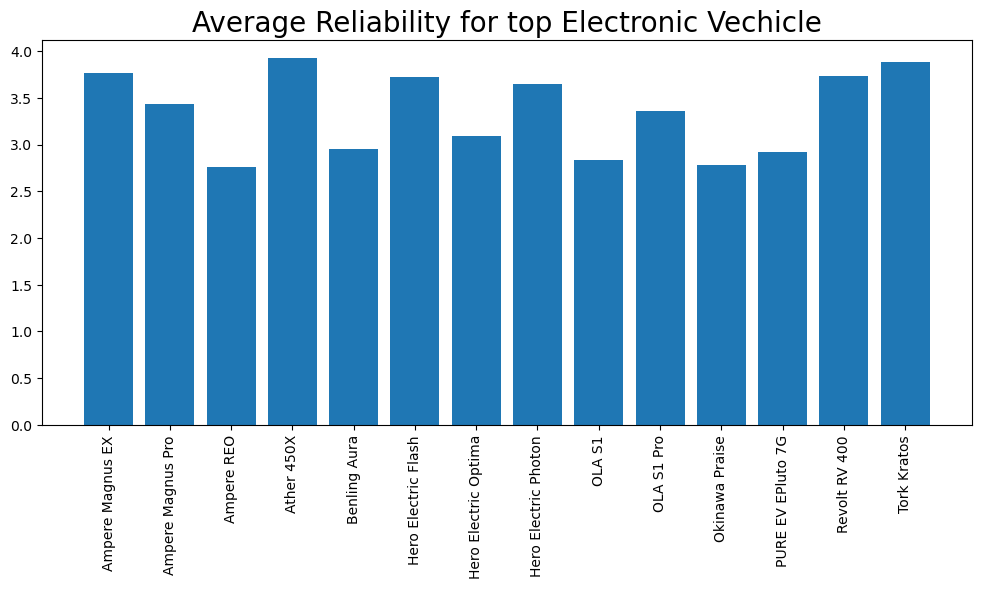

In [58]:
# Average Reliability for all electronic vechicle

plt.figure(figsize=(12,5))
plt.bar(gk.index, gk["Reliability"])
plt.title("Average Reliability for top Electronic Vechicle", fontsize = 20)

plt.xticks(rotation=90);

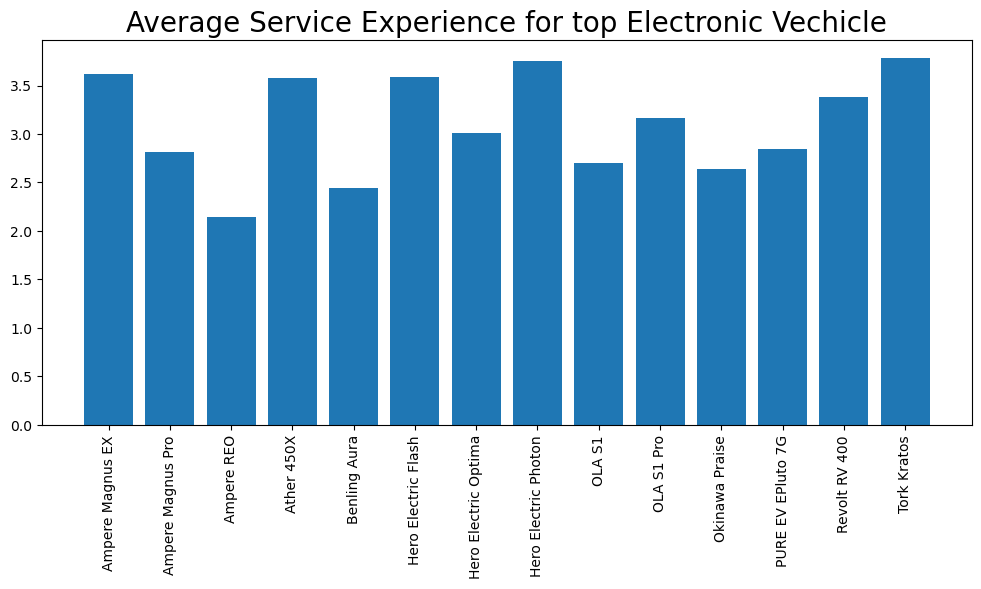

In [57]:
# Average Service Experience for all electronic vechicle

plt.figure(figsize=(12,5))
plt.bar(gk.index, gk["Service Experience"])
plt.title("Average Service Experience for top Electronic Vechicle", fontsize = 20)

plt.xticks(rotation=90);

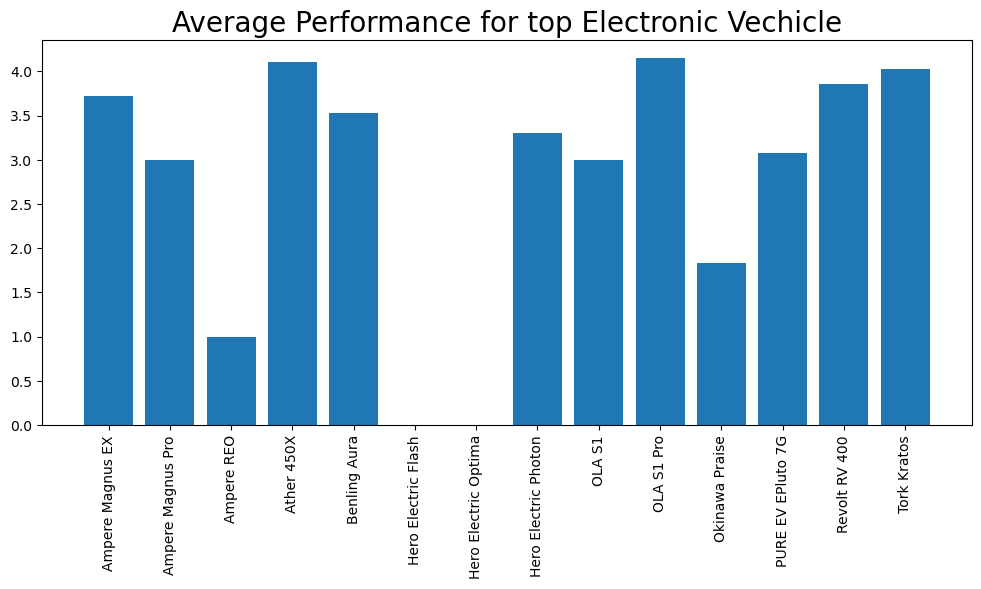

In [61]:
# Average Performance for all electronic vechicle

plt.figure(figsize=(12,5))
plt.bar(gk.index, gk["Performance"])
plt.title("Average Performance for top Electronic Vechicle", fontsize = 20)

plt.xticks(rotation=90);

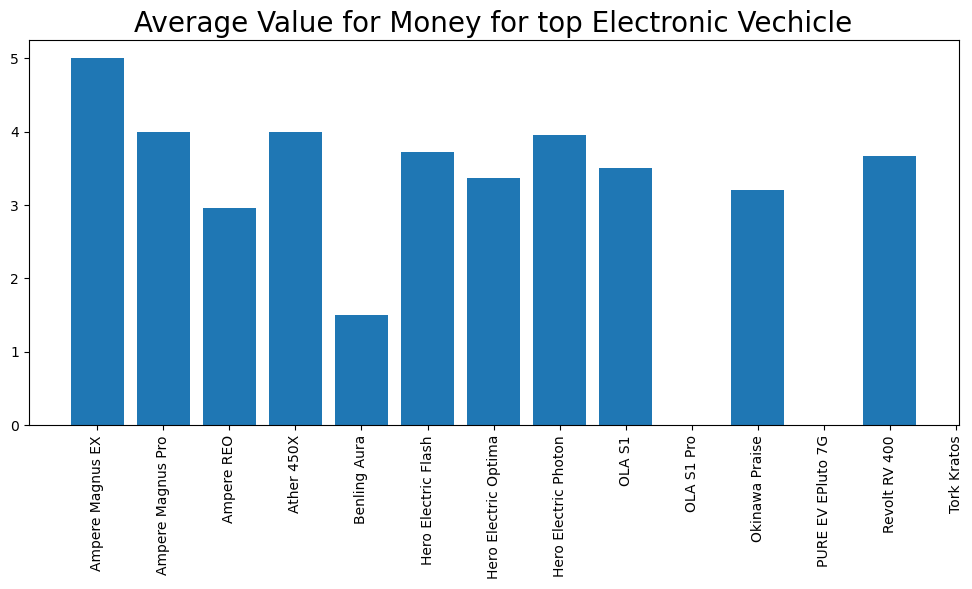

In [62]:
# Average Value for Money for all electronic vechicle

plt.figure(figsize=(12,5))
plt.bar(gk.index, gk["Value for Money"])
plt.title("Average Value for Money for top Electronic Vechicle", fontsize = 20)

plt.xticks(rotation=90);

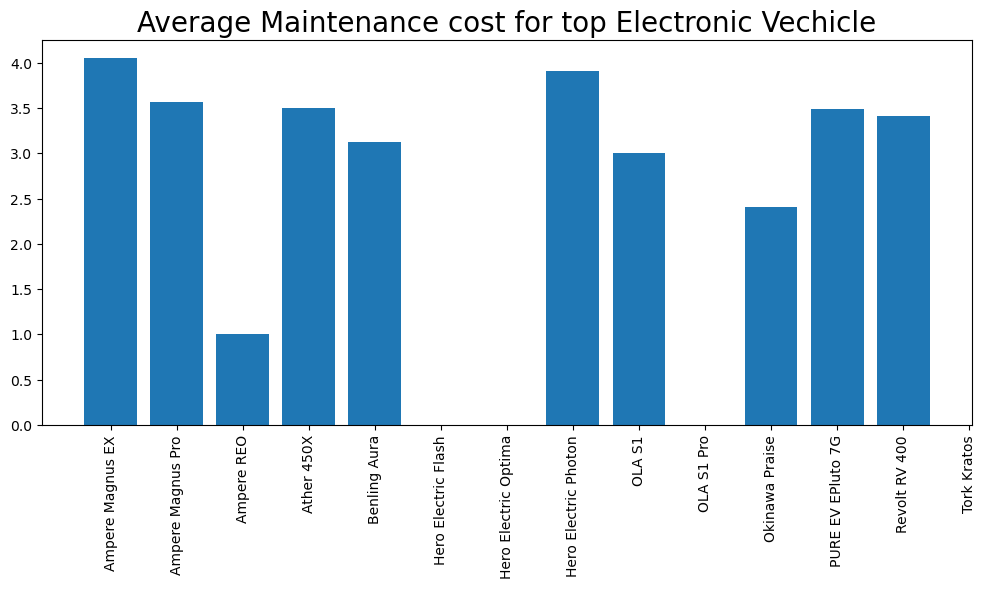

In [66]:
# Average Maintenance cost for all electronic vechicle

plt.figure(figsize=(12,5))
plt.bar(gk.index, gk["Maintenance cost"])
plt.title("Average Maintenance cost for top Electronic Vechicle", fontsize = 20)

plt.xticks(rotation=90);

In [77]:
# by analysing the data mostly liked or best performer Electronic vechicles

gk["Best performer"]=(gk["rating"] +gk["Reliability"]+gk["Performance"]+gk["Service Experience"]
                      +gk["Value for Money"])/5
gk.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Best performer
Model Name,,,,,,,,,,,,,
Ampere Magnus EX,4.000000,2.607143,1.192308,3.964286,4.153846,3.760000,3.720000,3.619048,3.619048,5.000000,4.052632,5.000000,4.012667
Ampere Magnus Pro,4.181818,3.136364,1.200000,3.090909,3.312500,3.437500,3.000000,2.812500,2.933333,4.000000,3.571429,4.000000,3.268182
Ampere REO,3.875000,3.833333,1.565217,2.583333,3.181818,2.761905,1.000000,2.142857,1.000000,3.047619,1.000000,2.952381,2.288095
Ather 450X,4.100000,2.833333,1.120000,3.666667,4.034483,3.923077,4.111111,3.576923,3.000000,3.851852,3.500000,4.000000,3.855556
Benling Aura,4.090909,3.318182,1.850000,2.863636,3.631579,2.947368,3.529412,2.444444,2.687500,2.000000,3.125000,1.500000,2.656972


In [78]:
gk.sort_values(['Best performer'],ascending = False)

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Best performer
Model Name,,,,,,,,,,,,,
Ampere Magnus EX,4.000000,2.607143,1.192308,3.964286,4.153846,3.760000,3.720000,3.619048,3.619048,5.000000,4.052632,5.000000,4.012667
Ather 450X,4.100000,2.833333,1.120000,3.666667,4.034483,3.923077,4.111111,3.576923,3.000000,3.851852,3.500000,4.000000,3.855556
Revolt RV 400,4.057692,2.192308,1.615385,3.826923,4.000000,3.733333,3.860465,3.386364,3.833333,4.000000,3.416667,3.666667,3.694750
Hero Electric Photon,3.894737,3.052632,1.558824,3.552632,4.029412,3.647059,3.307692,3.757576,2.727273,4.380952,3.916667,3.952381,3.643468
Ampere Magnus Pro,4.181818,3.136364,1.200000,3.090909,3.312500,3.437500,3.000000,2.812500,2.933333,4.000000,3.571429,4.000000,3.268182
OLA S1,4.034483,1.379310,1.000000,3.206897,3.789474,2.833333,3.000000,2.705882,3.066667,4.000000,3.000000,3.500000,3.049222
Benling Aura,4.090909,3.318182,1.850000,2.863636,3.631579,2.947368,3.529412,2.444444,2.687500,2.000000,3.125000,1.500000,2.656972
Okinawa Praise,4.031579,3.505263,1.728395,2.663158,3.520000,2.783784,1.833333,2.640000,2.083333,3.372549,2.409091,3.207547,2.625564
Ampere REO,3.875000,3.833333,1.565217,2.583333,3.181818,2.761905,1.000000,2.142857,1.000000,3.047619,1.000000,2.952381,2.288095


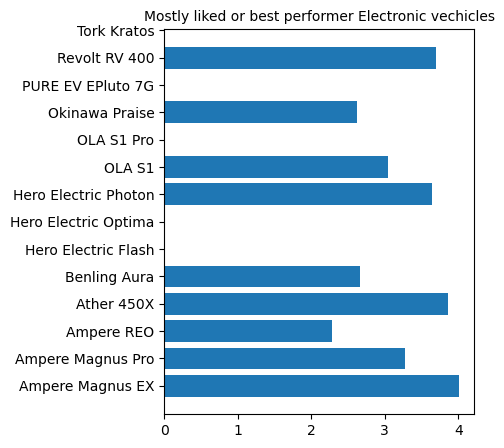

In [79]:
plt.figure(figsize=(4,5))
plt.barh(gk.index, gk["Best performer"])
plt.title("Mostly liked or best performer Electronic vechicles", fontsize = 10);